In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Diabetes.csv.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:ylabel='None'>

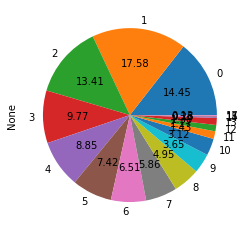

In [5]:
import matplotlib.pyplot as plt
df.groupby('Pregnancies').size().plot(kind='pie', autopct='%.2f')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#x=df.drop(['Outcome'],axis=1)
x=df['Glucose']

In [9]:
y=df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.3, random_state=132)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [17]:
lr.fit(xtrain,ytrain)

ValueError: Expected 2D array, got 1D array instead:
array=[143 123 130  99  97 122 166 120  81 195 108 126 107  82 146 129 129  99
  99  44  90  91 137   0 111  92 108 165 117 115  73  94 116 138 126 129
 141 171 176 121 128 164 112 110 112 139 103 154 182 118 128 122 122 133
  92 102  97 112 126 105 108  96 150 116  90 184 136 130 128 138  83 122
 180 175   0 100  98  84  93 173  90  83  95  92 121 140 107 137  99  76
 111  89 120 115 125 147 132  90 130 158  99 105 118 103 167 110  96 116
 189 125 137  91 124  90 137  97 100 136 106  89 148 109 121  93 123 180
  98  74  95 184 117 100 144 135  93 161 164  68  91 120 115 119  95 124
 118 184 106 102 108 106 115 112  94 122 187 155 158 100  88 128 101  90
 166 193  79 114 159 114  90  91 134 132   0 173 134 179 111 196 148  93
 129 112 112 158  81  88 136 120 132 109 158 124 129 146 146 117 114 160
 112 107 105 111  91  61 179 104  87 141 120  86 146 138  93 163 124 109
 126 125 125  84  80 162 112  99 115  94 134 170  94 119  86  88  96 129
  91 103  85 104  92 181  81 101 106 179 143 147 154  92  84  97 151 109
  86 100 170 103  68 153 189 114 129 128 108 163 114 136  87   0 128 173
 123 101 197 125 157 174 158 173  62 100 161 126 145 137 164  92 131 126
  75 125  95 153 176 124 105 134 197 141 172 111  84 183 108 129 139 162
 168 119 127  96  90  80 105 122 110 194 131 102 117 123  88  57  80 130
 154  89 177 112 140 158 139 104  82 114  95 156 181 165 124 109 125 150
 114 109  84 120  93 135 155  85 100 151 100 106  95 113  73  95 115  74
 106 104  88 136 137 142 186 111  96 101 115 124 180 151  88 106  80  88
 128 141 113 107 139  85 139 135 120 142 167 114 181 162 187 190 187 129
 126 100 120  99 102 105 117 102 178 103 194 109 131 181 104 137  99  83
 144 109 126  84 108 123 106  95 119  99 129 140 145 197  78 106 103 105
  74 157 128  91  81 108 117 134 110 125  84 154 127 171 141  84 133  78
 165  91 152 131 110 154 112 107 109  68 133  99 120 143 168 122 116 146
 122 105 123 111  85 183 120 111 180 130 138 102  71  94 162 117 169 188
 158 121  79  87 108 159 194 111 142 196 155 151 127 163 137 119 198  76
 125  93 103 134 130  94 102  85 129  77 147  90  57 199 181 100  98 111
 102  83  67 109 122 175 139 187 147 104 125 102 107  74  90].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred=lr.predict(xtest)

In [ ]:
accuracy = r2_score(ytest,y_pred)


In [ ]:
accuracy